# Decision Tree

Gli alberi decisionali sono algoritmi di ML molto versatili che possono essere utilizzati sia per problemi di regressione che di classificazione.

## Fare training e visualizzare un albero decisionale

Iniziamo importando il dataset degli iris

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()

iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [3]:
# 150 righe e 4 colonne

iris.data.shape

(150, 4)

In [4]:
#Per comodità utlizziamo solamente petal length e petal width

X = iris.data[: , 2:]
y = iris.target

In [16]:
tree_clf = DecisionTreeClassifier(max_depth = 2)
tree_clf.fit(X,y)

DecisionTreeClassifier(max_depth=2)

 ## Come si rappresenta?
 Abbiamo due modi per visualizzare un albero decisionale: 
 1. usare tree.plot_tree(tree_clf)
 2. oppure usare la libreria export_graphviz

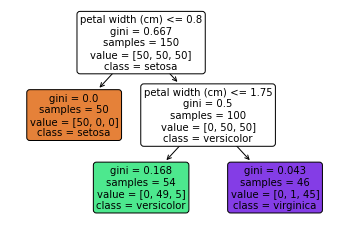

In [17]:
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure()
tree.plot_tree(tree_clf, 
               class_names=iris.target_names, 
               feature_names = iris.feature_names[2:], 
               filled=True, 
               rounded = True
              )
plt.show()

In [7]:
#! pip install graphviz
# https://graphviz.org/download/
from sklearn.tree import export_graphviz 
import os
import graphviz

dot_data = export_graphviz(tree_clf, out_file=None, 
                      feature_names=iris.feature_names[2:],  
                      class_names=iris.target_names,  
                      filled=True)  
graph = graphviz.Source(dot_data)  
graph 

ModuleNotFoundError: No module named 'graphviz'

### Leggere un albero decisionale

Supponiamo di avere un iris e volerlo classificare. Per prima cosa si parte dal root node (depth = 0). Questo nodo ci chiede se la lunghezza del petalo è <= 2.45

Se la risposta è sì, allora dobbiamo muoverci a sinistra e arriviamo ad una foglia (un nodo senza figli). Il fiore viene quindi classificato come un iris di tipo setosa. Se la risposta è invece no, ci si sposta sul nodo di destra: a questo punto bisogna invece guardale la larghezza del petalo, se questa è minore o uguale a 1.75 si finisce nella foglia verde, e quindi l'iris viene classificato come versicolor; se la larghezza è maggiore di 1.75 ci si muove a destra e l'iris viene classificato come virginica.

## DOMANDA:
come viene classificato un iris che ha lunghezza dei petali pari a 2.5 cm e larghezza pari a 3?

#### SAMPLES

L'attributo samples, presente in ogni nodo, rappresenta il numero di istanze del dataset che si applicano ad un determinato nodo.

#### VALUE

L'attributo value è rappresentato da una lista che ha tanti elementi quante sono le classi: nel nostro caso 3.
I valori corrispondono al numero di fiori del dataset che "arrivano" a quel nodo. Se consideriamo ad esempio la foglia verde abbiamo value = [0, 49, 5], questo significa che il nodo si applica a 54 fiori (49 + 5), 49 di tipo versicolor e 5 di tipo  virginica.

#### GINI

L'attributo gini è una misura dell'impurità del nodo: tanto più l'indice è alto tanto più il nodo è impuro. Un nodo è considerato come 'puro' se gini = 0 cioè se tutte le istanze che si applicano a quel nodo appartengono alla stessa classe.Un esempio di nodo puro è dato dalla foglia arancione:
questo nodo si applica a 50 fiori che sono tutti della classe setosa.

Consideriamo il nodo verde: per calcolare l'indice di gini si procede come segue:
    
    1 - (0/54)^2 - (49/54)^2 - (5/54)^2 = 0,168 

In [8]:
import numpy as np

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

plot_step = 0.2

# Griglia di punti
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
Z = tree_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
#plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

plt.scatter(X[:, 0], X[:, 1], c=y, s=30)
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.show()

NameError: name 'tree_clf' is not defined

La zona rossa è quella definita dalla foglia arancione (petal_length <= 2.45)
La zona blu dalla condizione petal_length > 2.45 e petal width > 1.75
La zona gialla dalla condizione petal_length > 2.45 e petal width <= 1.75

### CART Training Algorithm

Per fare il training del modello scikit-learn utilizza un'algoritmo chiamato CART (Classification and Regression Tree) che produce solamente alberi binari: ogni nodo ha al massimo due foglie.

L'idea che sta alla base di questo algoritmo è quella di trovare una coppia (valore soglia, feature), nel nostro caso (2.45, petal length), che dia la maggior purezza possibile (non è altro che una media pesata).

Questo procedimento va a avanti finchè l'albero non arriva alla massima profondità oppure non ha più modo per massimizzare la purezza.

ESERCIZIO: utilizzando il dataset iris fai il training del modello utilizzando tutte le features a disposizione e disegna l'albero decisionale scegliendo come max_depth = 3 [soluzione](./soluzione/decisionTree_sol.ipynb).

In base a come funziona il CART Algorithm, sai dire perchè l'albero ha esattamente quella struttura?

## OVERFITTING VS UNDERFITTING

A differenza di un modello di regressione linerare, dove il numero di parametri è fissato a priori, gli alberi decisionali rappresentano invece modelli non parametrici, nel senso che il numero dei parametri del modello non è fissato a priori. Se non controllati questi modelli possono portare ad un problema di overfitting.


Uno degli iperparametri che ci permette di regolarizzare il modello è il max_depth: un max_depth troppo piccolo porterà ad avere un problema di underfitting mentre un numero troppo alto porterà ad avere un problema di overfitting. 

#### ESERCIZIO: 
utilizzando il seguente dataset make_moons(n_samples=100, shuffle=True, noise = 0.2, random_state=6) 
1. fai il training di un albero decisionale senza definire la profondità massima;
2. disegna l'albero;
3. disegna il grafico dividendo in aree;
4. leggendo la documentazione (https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)
 trova il modo di stampare quanto è profondo l'albero e il numero di foglie;
5. quale caratteristica è comune a tutte le foglie?

 [soluzione](./soluzione/MOONS.ipynb)

### REGRESSION

Come abbiamo già accennato all'inizio, gli alberi decisionali sono in grado di risolvere anche problemi di regressione.


In [21]:
from sklearn.datasets import make_regression
X,y = make_regression(n_samples=200, n_features=1, bias=1, noise=6, shuffle=True)
y = y**2

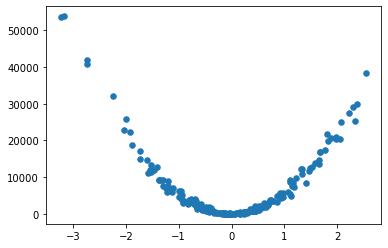

In [22]:
plt.scatter(X[:, 0],y, s=30)

In [23]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=3)
tree_reg.fit(X,y)

DecisionTreeRegressor(max_depth=3)

In [24]:
from sklearn.tree import export_graphviz 
import os
import graphviz

dot_data = export_graphviz(tree_reg, out_file=None, 
                      feature_names=['X'],  
                      class_names=['y'],  
                      filled=True)  
graph = graphviz.Source(dot_data)  
graph 

ModuleNotFoundError: No module named 'graphviz'

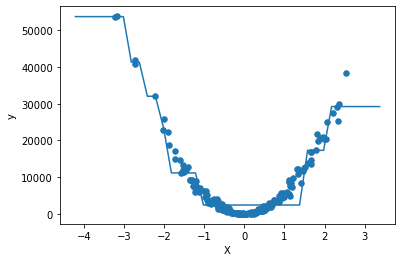

In [25]:
import numpy as np

x_min, x_max = X.min() - 1, X.max() + 1

plot_step = 0.2
x = np.arange(x_min, x_max, plot_step).reshape(-1, 1)
Z = tree_reg.predict(x)
plt.plot(x[:,0], Z)
plt.scatter(X, y, s=30)
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [26]:
x.shape

(39, 1)